In [1]:
import cv2 
import sys
from matplotlib import pyplot as plt
import math 
from PIL import Image
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random
from collections import defaultdict
import operator

In [2]:
# Get user supplied values
img = cv2.imread("54.jpg")
cascPath = "haarcascade_frontalface_default.xml"

In [3]:
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

# Read the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



In [4]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

print("Found {0} faces!".format(len(faces)))

# Draw a rectangle around the faces
padding=25
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x-padding, y-padding), (x+w+padding, y+h+padding), (0, 255, 0), 2)



Found 1 faces!


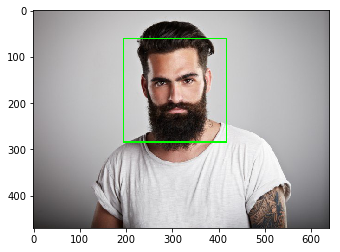

In [5]:
cv2.imshow("Faces found", img)
img_out= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_out)
plt.show()

In [24]:
#Trying segmentation using K means Clustering algorithm but didn't get satisfying result

In [ ]:
im = Image.open('54.jpg')
arr = np.asarray(im)

im = Image.open('54.jpg')
arr_out = np.asarray(im)

rows,columns = np.shape(arr_out)
print ('background pixel level',arr_out[0][0])

ground_out = np.zeros((rows,columns))


for i in range(rows):
    for j in range(columns):
        if arr_out[i][j] > 120:
            ground_out[i][j] = 0

        else:
            ground_out[i][j] = 1

plt.figure()
plt.imshow(ground_out, cmap="Greys_r")
plt.show()


shape = np.shape(arr)

rows = shape[0]
columns = shape[1]

r_points = [ random.randint(0, 255) for i in range(6) ]
g_points = [ random.randint(0, 255) for i in range(6) ]
b_points = [ random.randint(0, 255) for i in range(6) ]

grey_l = defaultdict(list)


grey1 = 40
grey2 = 80
grey3 = 120
grey4 = 160
grey5 = 200
grey6 = 240

grey_l[0] = 40
grey_l[1] = 80
grey_l[2] = 120
grey_l[3] = 160
grey_l[4] = 200
grey_l[5] = 240



g = defaultdict(list)

g2 = []
g3 = []
g4 = []
g5 = []
g6 = []

end = np.zeros((rows,columns))
zavg = [0,0,0]	

''' computing average centroids after every iteration'''

def find_centroids(g):
    red_cent_list = []
    blue_cent_list = []
    green_cent_list = []

    for i in range(0,6):
        array = np.matrix(g[i])
        avg = np.mean(array,0)
        pavg = np.ravel(avg)
        if not len(pavg):
            red_cent_list.append(zavg[0]) 
            blue_cent_list.append(zavg[1]) 
            green_cent_list.append(zavg[2])
        else:
            red_cent_list.append(pavg[0]) 
            blue_cent_list.append(pavg[1]) 
            green_cent_list.append(pavg[2])
    return[red_cent_list,blue_cent_list,green_cent_list] 


for it in range(0,10):
    print ('\niteration',it)
    g= defaultdict(list)
    for r in range(rows):
        for c in range(columns):
            img = arr[r][c]
            red = img[0]
            green = img[1]
            blue =  img[2]

            distance_list = []
            for k in range(0,6):
                

                distance = math.sqrt(((int(r_points[k])- red)**2)+((int(g_points[k]) - green)**2)+((int(b_points[k])-blue)**2))
                distance_list.append(distance)

            index, value = min(enumerate(distance_list), key=operator.itemgetter(1))
            end[r][c] = grey_l[index]

            g[index].append([red,blue,green])
    centroids= find_centroids(g)

    r_points = []
    b_points = []
    g_points = []
    r_points = centroids[0]
    b_points = centroids[1]
    g_points = centroids[2]



result = np.zeros((rows,columns))
ref_val = end[0][0]
for i in range(rows):
    for j in range(columns):
        if end[i][j] ==  ref_val:
            result[i][j] = 1

        else:
            result[i][j] = 0

tp = 0
tn = 0
fn = 0
fp = 0

for i in range(rows):
    for j in range(columns):
        if ground_out[i][j] == 1 and result[i][j] == 1:
            tp = tp + 1
        if ground_out[i][j] == 0 and result[i][j] == 0:
            tn = tn + 1
        if ground_out[i][j] == 1 and result[i][j] == 0:
            fn = fn + 1
        if ground_out[i][j] == 0 and result[i][j] == 1:
            fp = fp + 1



print ('Calculation of Tpr, Fpr, F-Score')

tpr= float(tp)/(tp+fn)
print ("\nTPR is:",tpr)

fpr= float(fp)/(fp+tn)
print ("\nFPR is:",fpr)

fscore = float(2*tp)/((2*tp)+fp+fn)
print ("\nFscore:",fscore)


plt.figure()
plt.imshow(end)
plt.show()


plt.figure()
plt.imshow(result, cmap="Greys_r")
plt.colorbar()
plt.show()

In [19]:
# So found out the best practice is by object tracking so i keep searching for the range of black scale in the picture
# then change color of this region by the color in the histogram that has the max no. of pixels

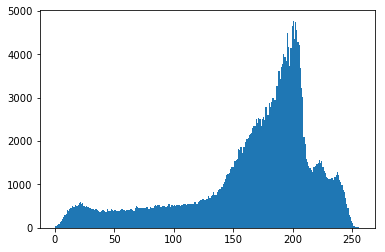

In [18]:
img_grey = cv2.imread('54.jpg',0)
#hist = cv2.calcHist([hsv], [0, 1, 2], None,(8, 8, 8),[0, 180, 0, 256, 0, 256])
hist = cv2.calcHist([img_grey],[0],None,[256],[0,256])
plt.hist(img_grey.ravel(),256,[0,256]); plt.show()
#print(hist.argmax())

In [9]:
img=cv2.imread('54.jpg')
hsv= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [10]:
lower_black=np.array([0,0,0])
upper_black=np.array([180,255,40])

In [11]:
mask = cv2.inRange(hsv, lower_black, upper_black)

In [12]:
res = cv2.bitwise_and(img,img, mask= mask)

In [13]:
#cv2.imshow('img',img)
#cv2.imshow('mask',mask)
cv2.imshow('res',res)
k = cv2.waitKey(5)
cv2.destroyAllWindows()

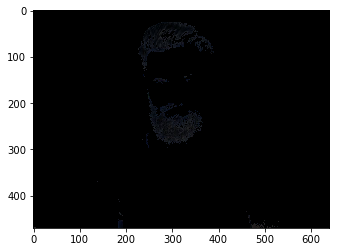

In [14]:
plt.imshow(res)
plt.show()

In [15]:
res[res>0]=hist.argmax()

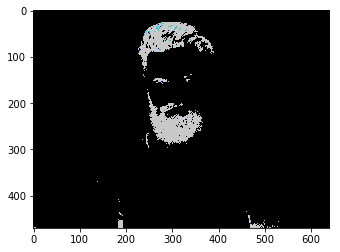

In [16]:
plt.imshow(res)
plt.show()